## Follow along in this notebook to see the creation process of Figure 1: Species Diversity

### We will first import any packages needed

In [33]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

### We can now load in and preview the data

In [34]:
cfh = 'F:\\Research\\Funded\\UIREEJ\\Flint_River_Ecology\\Data\\Catch.pkl'
catch = pd.read_pickle(cfh)
catch[['Fish', 'Site', '_Site', 'Species', '_Species']].head(15)

,Fish,Site,_Site,Species,_Species
0,1.0,2.0,South Up-Stream,2.0,Smallmouth bass
1,2.0,2.0,South Up-Stream,2.0,Smallmouth bass
2,3.0,2.0,South Up-Stream,2.0,Smallmouth bass
3,4.0,2.0,South Up-Stream,4.0,Rock bass
4,5.0,2.0,South Up-Stream,4.0,Rock bass
5,6.0,2.0,South Up-Stream,5.0,Bluegill
6,7.0,2.0,South Up-Stream,5.0,Bluegill
7,8.0,2.0,South Up-Stream,5.0,Bluegill
8,9.0,2.0,South Up-Stream,8.0,Green sunfish
9,10.0,2.0,South Up-Stream,8.0,Green sunfish


### Seperate up and down Stream

In [35]:
down = catch.loc[catch['Site'].isin([1.0,3.0])]
down_df = down.groupby(down.loc[:,'_Species']).size()
down_df.name = 'down'
up = catch.loc[catch['Site'].isin([2.0,4.0])]
up_df = up.groupby(up.loc[:,'_Species']).size()
up_df.name = 'up'

### Combine

In [36]:
metadata = pd.merge(down_df, up_df, how='outer', left_index=True, right_index=True)
metadata

,down,up
_Species,,
Bigmouth Buffalo,6.0,NaN
Black bullhead,3.0,49.0
Black crappie,3.0,1.0
Bluegill,347.0,246.0
Bowfin,7.0,NaN
Brown bullhead,1.0,3.0
Channel catfish,12.0,4.0
Common Shinner,117.0,NaN
Common carp,111.0,16.0


### Plot Formatting

In [37]:
matplotlib.rcParams['font.family'] = 'consolas'
matplotlib.rcParams['axes.titlecolor'] = 'black'
matplotlib.rcParams['axes.titlesize'] = 39
matplotlib.rcParams['axes.titlepad'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 26
matplotlib.rcParams['axes.labelpad'] = 25
matplotlib.rcParams['axes.xmargin'] = .75
matplotlib.rcParams['axes.ymargin'] = .025
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['legend.labelspacing'] = 1
matplotlib.rcParams['legend.framealpha'] = 0
matplotlib.rcParams['text.usetex'] = True

### Plot

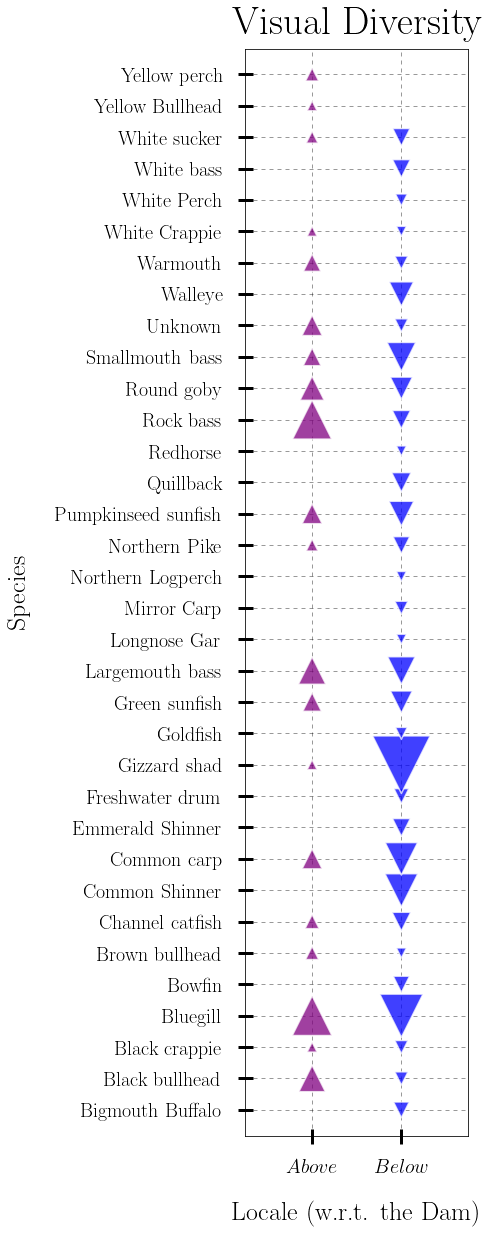

In [38]:
plt.tick_params(direction='inout',axis='both', pad=15, width=3, length=15, color='black')
plt.grid(dashes=[5, 5], animated=True, alpha=.5, c='black', zorder=3)
plt.xticks(rotation=0, ha='center')
plt.title(r'Visual Diversity', style='oblique')
plt.xlabel(r'Locale (w.r.t. the Dam)', style='italic')
plt.ylabel(r'Species', style='italic')

# Y
species = metadata.index.tolist()

# Bubble Scales
import math
down = (100*metadata.down.apply(lambda x: math.sqrt(x))).tolist()
up = (100*metadata.up.apply(lambda x: math.sqrt(x))).tolist()

# X 
dx = [r'$Below$']*len(down)
ux = [r'$Above$']*len(up)

# PLOT
plt.scatter(ux, species, s=up, alpha=.75, c='purple', marker='^', edgecolor='white', linewidth=1.5, zorder=2)
plt.scatter(dx, species, s=down, alpha=.75, c='blue', marker='v',edgecolor='white', linewidth=1.5, zorder=2)

# SCALE
fig = plt.gcf()
fig.set_size_inches(4, 20)

# SHOW
plt.show()